In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
plt.rcParams['font.family'] = ["Arial"]
plt.rcParams['font.size'] = 14

In [4]:
CN_MCI_folds_data_neighbor = [
    {'MCC': 0.27379454926624736, 'Accuracy': 0.6326530612244898, 'Precision': 0.6411414880417576},
    {'MCC': 0.1883272994474559, 'Accuracy': 0.5918367346938775, 'Precision': 0.5998763141620285},
    {'MCC': 0.08518493278575826, 'Accuracy': 0.5510204081632653, 'Precision': 0.5475017593244194},
    {'MCC': 0.13714844455739905, 'Accuracy': 0.5714285714285714, 'Precision': 0.5707956199759479},
    {'MCC': 0.31914250088975643, 'Accuracy': 0.673469387755102, 'Precision': 0.6711958467597565}
]

In [5]:
CN_MCI_folds_data_weights = [
    {'MCC': 0.7335155457429191, 'Accuracy': 0.8673469387755102, 'Precision': 0.8677223397720292},
    {'MCC': 0.6083449942418495, 'Accuracy': 0.7959183673469388, 'Precision': 0.813912661838929},
    {'MCC': 0.7937710437710438, 'Accuracy': 0.8979591836734694, 'Precision': 0.8979591836734694},
    {'MCC': 0.6954347826512214, 'Accuracy': 0.8469387755102041, 'Precision': 0.8486224489795917},
    {'MCC': 0.7665135157089951, 'Accuracy': 0.8877551020408163, 'Precision': 0.8879585507220167}
]

In [13]:
CN_MCI_folds_data = [
    {"MCC": 0.7743485348273336, "Accuracy": 0.8877551020408163, "Precision": 0.8886661807580176},
    {"MCC": 0.6629847260093013, "Accuracy": 0.826530612244898, "Precision": 0.8373466726977622},
    {"MCC": 0.8561241929692257, "Accuracy": 0.9285714285714286, "Precision": 0.92890086852351},
    {"MCC": 0.7989153108051731, "Accuracy": 0.8979591836734694, "Precision": 0.9009561271317039},
    {"MCC": 0.7022402003404311, "Accuracy": 0.8571428571428571, "Precision": 0.8573988735279058}
]

In [17]:
# 计算MCC的均值
mcc_values = [item['MCC'] for item in CN_MCI_folds_data]
mcc_mean = sum(mcc_values) / len(mcc_values)

mcc_mean

#20.1%
#71.95%
#75.89%

0.758922592990293

In [7]:
# 数据准备
neighbor_df = pd.DataFrame(CN_MCI_folds_data_neighbor)
weight_df = pd.DataFrame(CN_MCI_folds_data_weights)
CN_MCI_df = pd.DataFrame(CN_MCI_folds_data)

# 转换数据为长格式，便于绘图
neighbor_long = neighbor_df.melt(var_name="Metric", value_name="Score")
weight_long = weight_df.melt(var_name="Metric", value_name="Score")
CN_MCI_long = CN_MCI_df.melt( var_name="Metric", value_name="Score")

# 设置图形样式
sns.set(style="whitegrid")

# 创建图形和轴对象
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)

# 绘制箱形图和散点图
sns.boxplot(data=neighbor_long, x='Metric', y='Score', ax=axes[0], color='lightblue')
sns.stripplot(data=neighbor_long, x='Metric', y='Score', ax=axes[0], color='black', jitter=True, size=5)

sns.boxplot(data=weight_long, x='Metric', y='Score', ax=axes[1], color='lightgreen')
sns.stripplot(data=weight_long, x='Metric', y='Score', ax=axes[1], color='black', jitter=True, size=5)

sns.boxplot(data=GCNs_long, x='Metric', y='Score', ax=axes[2], color='lightcoral')
sns.stripplot(data=GCNs_long, x='Metric', y='Score', ax=axes[2], color='black', jitter=True, size=5)

sns.boxplot(data=CN_AD_long, x='Metric', y='Score', ax=axes[3], color='lightcoral')
sns.stripplot(data=CN_AD_long, x='Metric', y='Score', ax=axes[3], color='black', jitter=True, size=5)

# 设置标题
axes[0].set_title("sim+cog_weights+GCN+SAGE")
axes[1].set_title("sim+knn+GCN+SAGE")
# axes[2].set_title("sim+knn+cog_weights+2GCN")
axes[3].set_title("sim+knn+cog_weights+GCN+SAGE")

# 设置轴标签
for ax in axes:
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Scores")
    ax.yaxis.grid(True)  # 添加水平网格线

plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

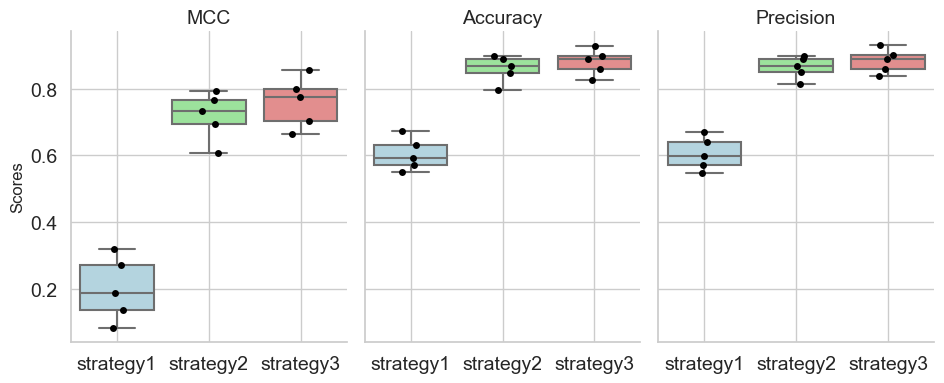

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
neighbor_df = pd.DataFrame(CN_MCI_folds_data_neighbor)
weight_df = pd.DataFrame(CN_MCI_folds_data_weights)
CN_MCI_df = pd.DataFrame(CN_MCI_folds_data)

# 为数据添加组标签
neighbor_df['Group'] = 'strategy1'
weight_df['Group'] = 'strategy2'
# GCNs_df['Group'] = 'strategy 3'
CN_MCI_df['Group'] = 'strategy3'

# 合并数据集
combined_df = pd.concat([neighbor_df, weight_df, CN_MCI_df])

# 转换数据为长格式，便于绘图
combined_long = combined_df.melt(id_vars=["Group"], var_name="Metric", value_name="Score")

# 设置图形样式
sns.set(style="whitegrid")

# 使用 FacetGrid 按 Metric 分组绘制图形
g = sns.FacetGrid(combined_long, col="Metric", height=4, aspect=0.8, col_wrap=3)
g.map_dataframe(sns.boxplot, x='Group', y='Score', palette=['lightblue', 'lightgreen', 'lightcoral'])#,'lavender'
g.map_dataframe(sns.stripplot, x='Group', y='Score', color='black', jitter=True, size=5)

# 设置图形标题和标签
g.set_titles("{col_name}")
g.set_axis_labels("", "Scores")
for ax in g.axes.flat:
    # 设置刻度字体大小
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel("")
    ax.set_title(ax.get_title(), fontsize=14)
    ax.xaxis.grid(True)  
    #ax.yaxis.grid(True)# 添加水平网格线
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
